# Downloading Compatible Libraries

In [1]:
!pip install -U "tensorflow-text==2.15.*"
!pip install -U "tf-models-official==2.15.*"

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 40.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing ins

In [2]:
import tensorflow as tf

2024-11-02 17:03:35.942783: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 17:03:35.942851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 17:03:35.944454: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
tf.__version__

'2.15.1'

# Importing Libararies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset, EDA, Preprocessing and Feature Engineering

In [5]:
news_data = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv', index_col=0)

In [6]:
news_data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [8]:
news_data.describe(include='object')

,title,text
count,71576,72095
unique,62347,62718
top,Factbox: Trump fills top jobs for his administ...,
freq,14,738


In [9]:
news_data.isna().sum()

title    558
text      39
label      0
dtype: int64

In [10]:
news_data[news_data['title'].isna()]

,title,text,label
1,NaN,Did they post their votes for Hillary already?,1
43,NaN,True. Hillary needs a distraction and what bet...,1
162,NaN,All eyes on Electoral delegates. The People kn...,1
185,NaN,Cool,1
269,NaN,A leading US senator: US Supporting War in Syr...,1
...,...,...,...
71484,NaN,Another Arab supremacist masturbation fantasy....,1
71521,NaN,I'm sure they drastically changed accounting m...,1
71540,NaN,It's easy to imagine Obama or Kerry pissing hi...,1
71570,NaN,Ever since the powers to be assassinated JFK A...,1


In [11]:
news_data[news_data['text'].isna()]

,title,text,label
2457,Après le succès de « Mariés au premier regard ...,NaN,1
3534,Elections US : les premières estimations donne...,NaN,1
3709,110% des Américains assurent qu’ils continuero...,NaN,1
5612,Des millions d’Américains recherchent massivem...,NaN,1
6270,Vladimir Poutine est élu 45e Président des Eta...,NaN,1
6997,Les Américains ne sont plus qu’à quelques heur...,NaN,1
7083,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,1
8974,Live Soirée présidentielle US 2016 >> Le Gorafi,NaN,1
16717,Ne supportant plus l’ambiance de la campagne é...,NaN,1
17781,Débat Primaire de la Droite : les Français pas...,NaN,1


In [12]:
news_data['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

<Axes: xlabel='label'>

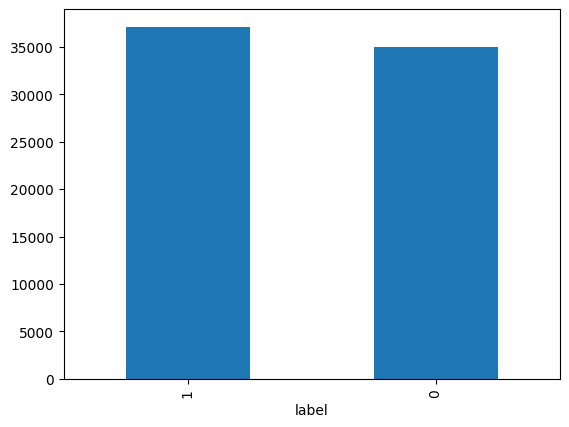

In [13]:
news_data['label'].value_counts().plot(kind='bar')

In [14]:
# news_data['title'] = news_data['title'].astype('string')
# news_data['text'] = news_data['text'].astype('string')

In [15]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [16]:
news_data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [17]:
news_data.isna().sum()

title    558
text      39
label      0
dtype: int64

In [18]:
news_data.dropna(inplace=True)

In [19]:
news_data.isna().sum()

title    0
text     0
label    0
dtype: int64

In [20]:
news_data['text_len'] = news_data['text'].apply(len)

In [21]:
news_data.head()

,title,text,label,text_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530


In [22]:
news_data['title_len'] = news_data['title'].apply(len)

In [23]:
news_data.head()

,title,text,label,text_len,title_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049,130
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216,137
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916,95
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530,78


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='title_len', ylabel='Count'>

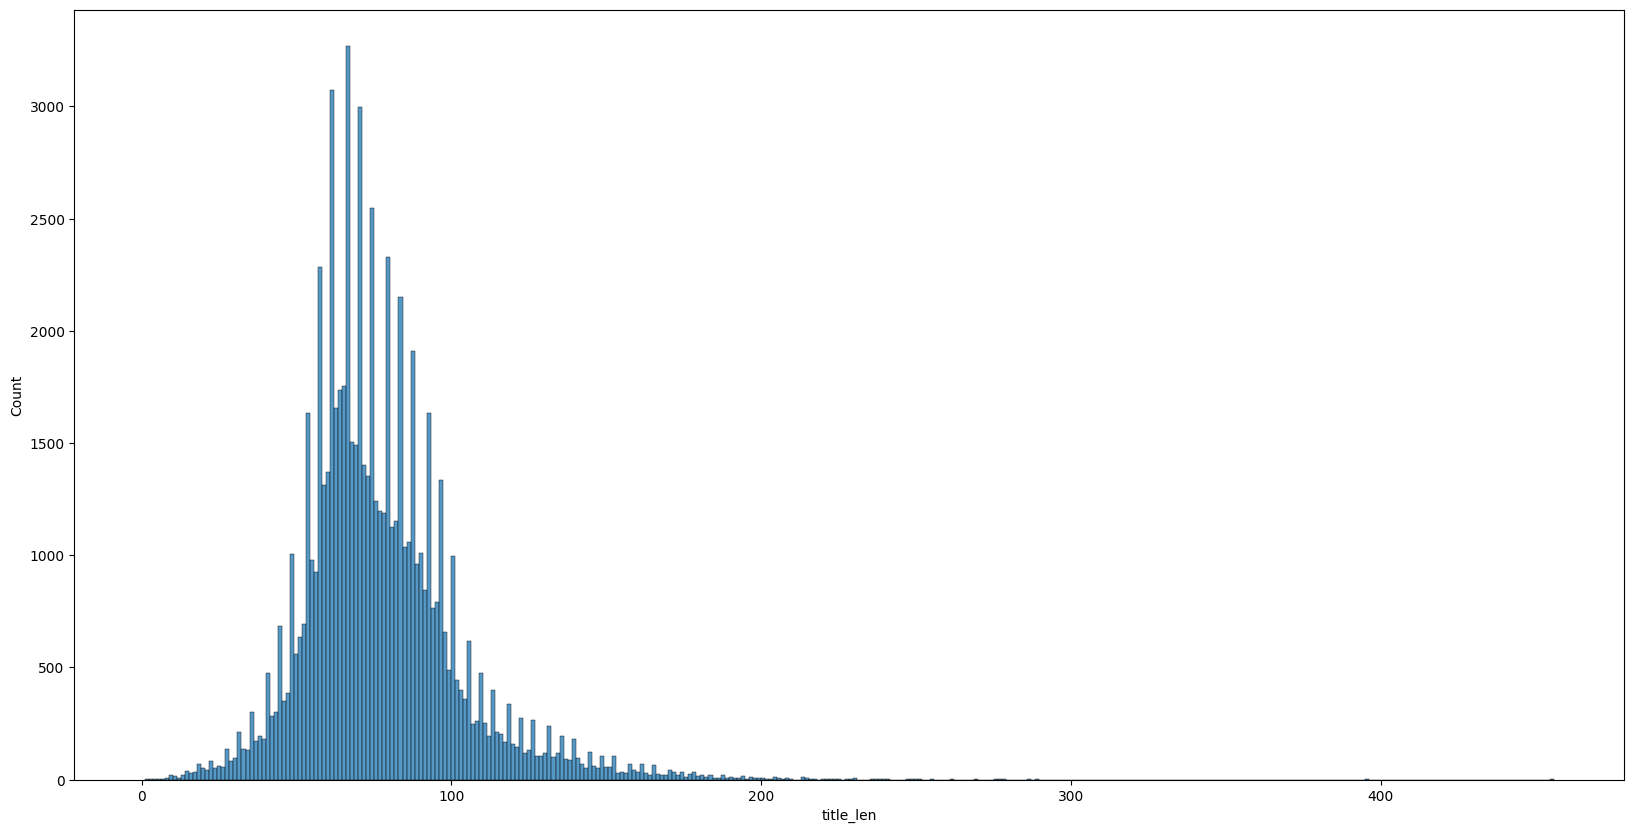

In [24]:
plt.figure(figsize=(20, 10))
sns.histplot(data=news_data, x='title_len')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='text_len', ylabel='Count'>

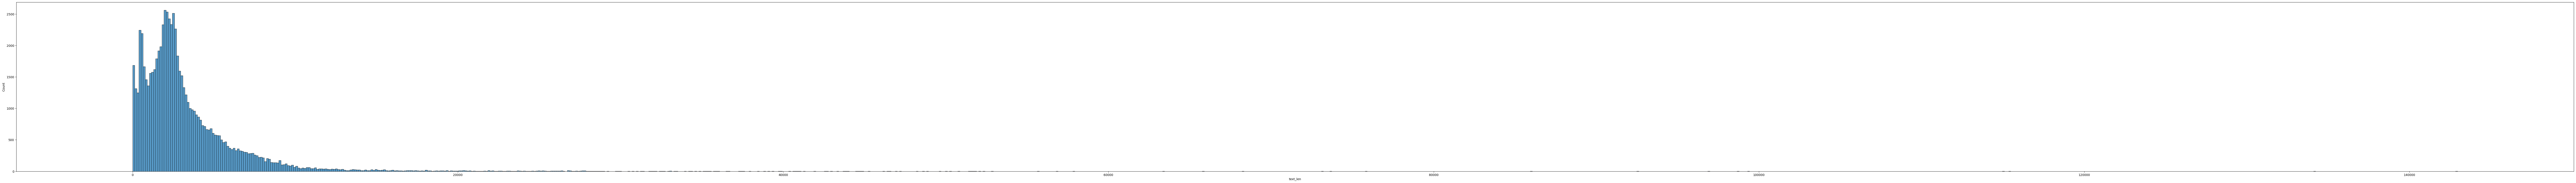

In [25]:
plt.figure(figsize=(150, 10))
sns.histplot(news_data['text_len'])

In [26]:
news_data['text_len'].sort_values(ascending=False)

6445     142961
327      134206
34523    115372
54433    115372
17557    115010
          ...  
36555         1
36533         1
54941         1
8231          1
49715         1
Name: text_len, Length: 71537, dtype: int64

In [27]:
news_data['title_len'].sort_values(ascending=False)

37207    456
44714    396
29935    289
71215    289
17630    286
        ... 
66145      5
27330      4
6367       4
31328      3
38051      1
Name: title_len, Length: 71537, dtype: int64

In [28]:
news_data[(news_data['text_len'] < 40)]

,title,text,label,text_len,title_len
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1,1,79
106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1,1,68
325,Ohio State University Student Says Terrorist A...,,1,1,99
364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,1,1,114
512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,1,1,85
...,...,...,...,...,...
71830,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,WOW This woman absolutely nails it!,1,35,171
71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,1,1,86
72026,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,,1,1,78
72119,BILL O’REILLY Destroys Liberal Pundit On Trump...,,1,1,63


In [29]:
news_data['label'].value_counts()

label
1    36509
0    35028
Name: count, dtype: int64

In [30]:
news_data[news_data['title_len'] < 10]

,title,text,label,text_len,title_len
6367,Wow!,http://www.thepoliticalinsider.com/wikileaks-c...,1,1214,4
11496,Tweetwave,This time it's true no pantsTweetwave More Of ...,1,27540,9
20251,Wikileaks,"Whales, elephants of the deep with fins the si...",1,1046,9
27330,EPIC,It didn’t take us long to think of a word to d...,1,2120,4
28323,Rick Rule,"97925 Views October 29, 2016 BROADCAST King Wo...",1,3959,9
29205,What If….,"all 30,000 of the “missing” Hillary emails are...",1,6071,9
31220,Ooh Fuck,Wednesday 9 November 2016 by Lucas Wilde Ooh F...,1,1323,8
31328,Rum,RIGHT REVERAND POPE JEREMIAH GOLDSTIEN says: \...,1,422,3
33356,What Now?,by Thomas Sowell \nThe good news is that we do...,1,4709,9
34341,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,1,578,8


In [31]:
news_data[news_data['text'].str.contains('Car')]

,title,text,label,text_len,title_len
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105
15,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,0,1655,64
18,MAJOR LIBERAL RAG RELUCTANTLY PUBLISHES Articl...,"The Atlantic, a publication that wouldn t know...",1,7181,159
28,Senators Propose Giving States Option to Keep ...,WASHINGTON — Several Republican senators on...,0,5361,86
33,"Schaeuble to head German parliament, unblockin...",BERLIN (Reuters) - Germany took a first decisi...,0,4438,63
...,...,...,...,...,...
72051,A standard dejection in the IRS help line,"By midmorning, the line of taxpayers outside t...",0,9341,41
72070,The “American Conservative Movement” Has Ended...,Here's something interesting from The Unz Revi...,1,14145,75
72082,SAY WHAT? Obama Gives Go Ahead For New UN “Reg...,"If seven years ago, someone told Americans tha...",1,7825,120
72121,Florida Judge Blames Rape Victim For Attendin...,The Ultra Music Festival in Miami is one of th...,1,2446,62


In [32]:
news_data

,title,text,label,text_len,title_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049,130
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216,137
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916,95
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530,78
...,...,...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,4788,65
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,3634,79
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,2864,57
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,3374,67


In [33]:
news_data['combined_text_title'] = news_data['title'] + ' ' + news_data['text']

In [34]:
news_data.head()

,title,text,label,text_len,title_len,combined_text_title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049,130,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216,137,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916,95,SATAN 2: Russia unvelis an image of its terrif...
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530,78,About Time! Christian Group Sues Amazon and SP...


In [35]:
news_data['combined_text_title'][0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO] No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:3

In [36]:
news_data['word_count'] = news_data['combined_text_title'].apply(lambda x: len(x.split()))

In [37]:
news_data['word_count'].sort_values(ascending=False)

327      24243
34523    20904
54433    20904
6445     20884
17557    20100
         ...  
52702        2
26286        2
8909         2
42774        2
35093        2
Name: word_count, Length: 71537, dtype: int64

In [38]:
news_data['word_count'].max()

24243

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


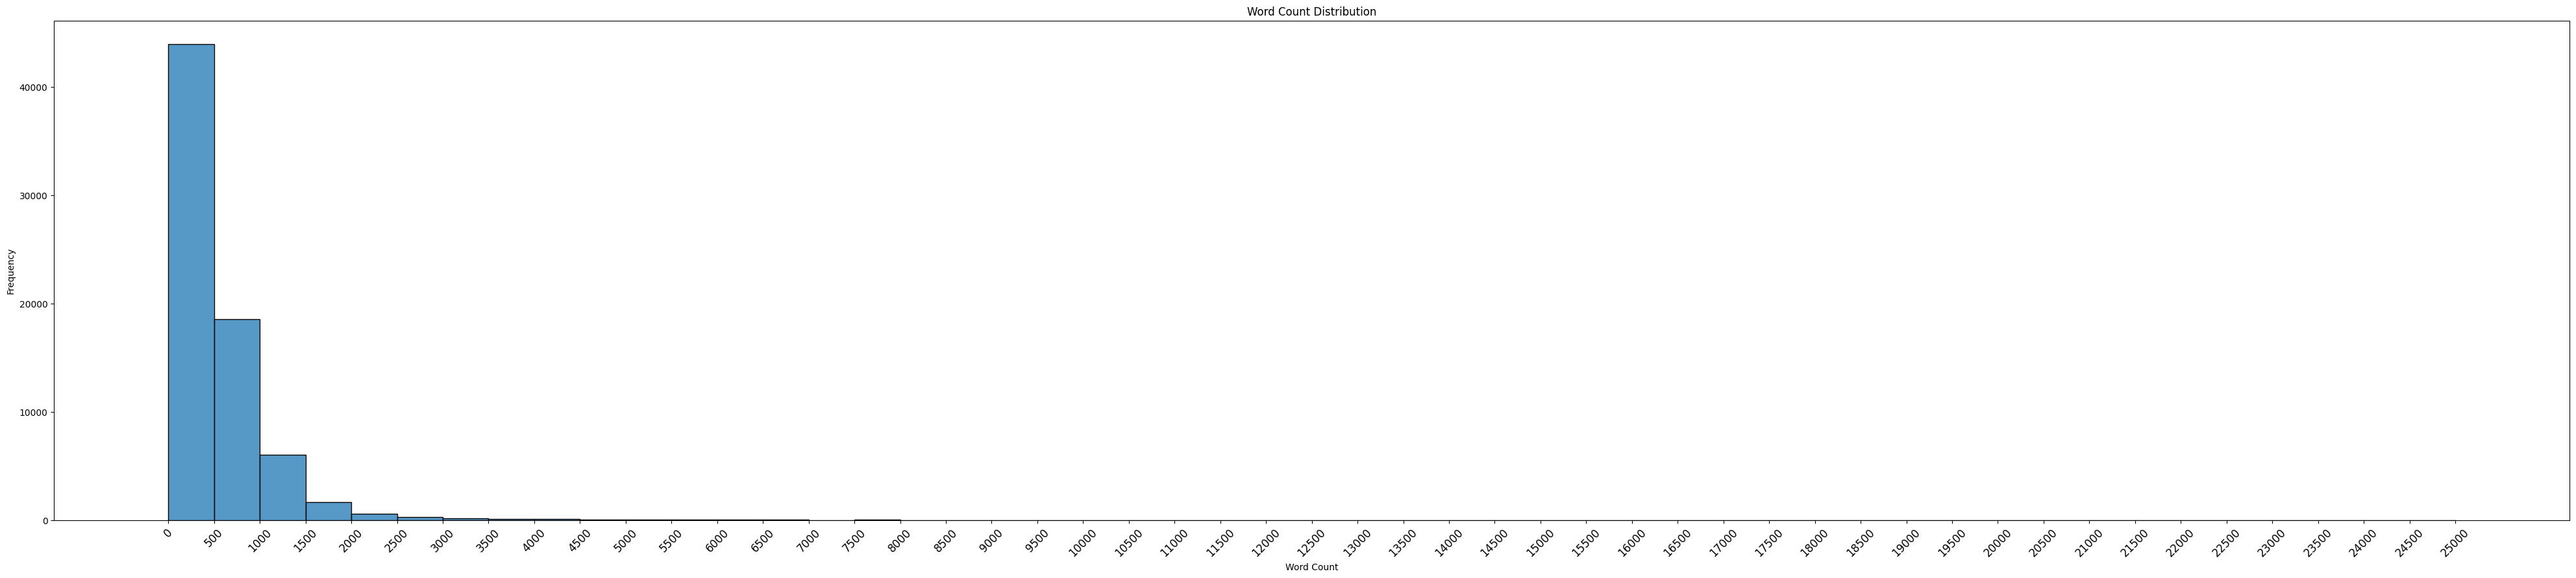

In [39]:
# Set up a large figure size for better readability
plt.figure(figsize=(50, 10))

# Define bins with an interval of 1000 based on the range of data
max_word_count = news_data['word_count'].max()
bins = list(range(0, max_word_count + 1000, 500))

# Plot the histogram with custom bins
sns.histplot(news_data['word_count'], bins=bins)

# Customize x-axis ticks to show every 1000 interval
plt.xticks(ticks=bins, rotation=45, fontsize=12)

# Add labels for clarity
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Word Count Distribution")

# Show the plot
plt.show()

In [40]:
news_data['word_count'].value_counts().nlargest(10)

word_count
406    163
413    162
415    157
419    154
412    152
418    148
411    145
402    144
414    142
376    142
Name: count, dtype: int64

In [41]:
news_data.reset_index(drop=True, inplace=True)

In [42]:
news_data.shape

(71537, 7)

In [43]:
news_data.head()

,title,text,label,text_len,title_len,combined_text_title,word_count
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,5049,130,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,889
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,216,137,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,52
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,8010,105,"Bobby Jindal, raised Hindu, uses story of Chri...",1337
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,1916,95,SATAN 2: Russia unvelis an image of its terrif...,345
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,1530,78,About Time! Christian Group Sues Amazon and SP...,257


## Word Embeddings and Vectorization
- Using BERT for creating word embeddings.

In [44]:
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf

In [45]:
from transformers import BertTokenizer

# Load the tokenizer from Hugging Face
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [46]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

bert_preprocess_model = hub.KerasLayer(preprocess_url)
bert_model = hub.KerasLayer(encoder_url)

In [47]:
news_data['combined_text_title'] = news_data['combined_text_title'].astype('string')

In [48]:
inputs = tokenizer(news_data['combined_text_title'][0], return_tensors="tf", truncation=True, max_length=512, padding="max_length")

In [49]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [50]:
inputs['input_ids']

<tf.Tensor: shape=(1, 512), dtype=int32, numpy=
array([[  101,  2375,  7285,  2006,  2152,  9499,  2206,  8767,  2114,
        10558,  1998, 12461,  2006,  1023,  1011,  2340,  3762,  1001,
         2304,  3669,  6961, 18900,  3334,  1998,  1001,  1042,  2100,
         2546,  2683, 14526, 15554,  1031,  2678,  1033,  2053,  7615,
         2003,  3517,  2013, 13857,  8112,  2372,  1997,  1996,  1001,
         1042,  2100,  2546,  2683, 14526,  2030,  1001, 11865,  4801,
        11253, 17802,  1998,  1001,  2304,  3669,  6961, 18900,  3334,
         5750,  2170,  2005,  1996, 11404,  2075,  1998,  5689,  1997,
         2317,  2111,  1998, 10558,  1012,  2027,  6628,  2500,  2006,
         1037,  2557,  2265,  9857,  2305,  2000,  2735,  1996, 10401,
         1998,  3102,  2317,  2111,  1998, 10558,  2000,  4604,  1037,
         4471,  2055,  1996,  4288,  1997,  2304,  2111,  1999,  2637,
         1012,  2028,  1997,  1996,  1042,  1008,  1008,  1008, 10930,
        10258,  8490, 18829, 

In [51]:
test = bert_preprocess_model([news_data['combined_text_title'][0]])
test.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [52]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [53]:
renamed_inputs = {
        'input_word_ids': inputs['input_ids'],
        'input_type_ids': inputs['token_type_ids'],
        'input_mask': inputs['attention_mask']
    }
    

In [54]:
embeddings = bert_model(renamed_inputs)

In [55]:
embeddings['pooled_output'].shape

TensorShape([1, 768])

In [56]:

# Function to tokenize and get embeddings
def get_embeddings(text, max_length=512):
    # Truncate with Hugging Face tokenizer
    inputs = tokenizer(text, return_tensors="tf", truncation=True, max_length=max_length, padding="max_length")

    # Rename keys names to match with of Keras layer keys
    renamed_inputs = {
        'input_word_ids': inputs['input_ids'],
        'input_type_ids': inputs['token_type_ids'],
        'input_mask': inputs['attention_mask']
    }
    
    
    # Preprocess and encode using TensorFlow Hub layers
    # preprocessed_text = bert_preprocess_model(input_ids)
    embeddings = bert_model(renamed_inputs)["pooled_output"]  # Get CLS token embedding
    
    return embeddings

In [57]:
get_embeddings(news_data['combined_text_title'][1]).shape

TensorShape([1, 768])

## Splitting data into train and test set.

In [58]:
from sklearn.model_selection import train_test_split

X = news_data['combined_text_title']
y = news_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, shuffle=True)

In [59]:
X_train.shape, X_test.shape

((57229,), (14308,))

In [60]:
X_train

57911    (VIDEO) UNBELIEVABLE! BLACK JUDGE BERATES VICT...
40241     Twitter HAMMERS Trump After He Says The Dumbe...
69686    Congress Takes Aim at DOJ ’Slush Fund’ to Left...
16469    Collusion Between Facebook and Hillary’s Campa...
54044    MUSLIM ACTIVISTS LAUNCH VOTER REGISTRATION DRI...
                               ...                        
10367     The GOP ‘Make America Sick Again’ Plan Was Re...
40139     Republican Candidate Gets Caught Calling For ...
56316    Buy Me Some Peanuts and Wiener Nougat - The Ne...
34963    Today’s Historic Front Page: Nov. 9, 2016 - Th...
4454     U.S. justices weigh federal fraud claim over w...
Name: combined_text_title, Length: 57229, dtype: string

## Creating Dataset Input Pipeline with train and test sets.

In [61]:
# Convert DataFrame to tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))

test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [62]:
for feature, target in train_dataset.take(1):
    print(feature.numpy())
    print('Target:', target.numpy())

b'(VIDEO) UNBELIEVABLE! BLACK JUDGE BERATES VICTIMS OF HOME INVASION AND YOU WON\xe2\x80\x99T BELIEVE WHY You won t believe this judge and how he berates a family that was terrorized in a home invasion. Can a three-year old help how she feels after this traumatic event?The reason Judge Olu Stevens of Louisville, Kentucky berated a family that was terrorized by two black home invaders   in court and on Facebook   will knock your socks off. In all my years, I don t think I ve ever seen such an egregious example of race-card abuse.The judge was  troubled  and  offended  by the fact that a three year victim was so traumatized by a violent home invasion, she is now fearful of black males.Jordan and Tommy Gray s 3-year old daughter was watching  SpongeBob  when two black armed men broke into her home and robbed her family at gunpoint   one of the perps pointing a gun in her father s face.Mom and dad honestly noted on the their victim impact statement that she is still afraid of black men 2 y

In [63]:
for feature, target in test_dataset.take(1):
    print(feature.numpy())
    print('Target:', target.numpy())

b'Maine official approves ballot initiative on marijuana legalization (Reuters) - A Maine state official on Wednesday validated a petition by pro-marijuana activists that would allow the state\xe2\x80\x99s voters to determine whether to make recreational use of the drug legal in the northeasternmost U.S. state. Maine Secretary of State Matthew Dunlap found that activists had collected enough verified signatures to be presented to state lawmakers for consideration, his office said in a statement. The state legislature has the option of approving the proposal as written or placing it on the ballot in November. That move followed a ruling by a state judge earlier this month that overruled an initial decision by Dunlap\xe2\x80\x99s office that almost half of the signatures gathered by the campaign were not valid, citing concerns that the signatures of notaries public on various forms submitted did not match up with versions on file in official state records. The referendum would allow adul

In [64]:
train_dataset = train_dataset.batch(32)

In [65]:
for fet, tar in train_dataset.take(1):
    print(fet.shape)
    print(tar.numpy())
    break

(32,)
[1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0]


## Prefetch and cache for improved performance while training.

In [66]:
train_dataset = train_dataset.cache().prefetch(tf.data.AUTOTUNE)

# Model Building

In [67]:
preprocessor = hub.load(
    "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")

seq_length = 128  # Your choice here.

# Step 1: tokenize batches of text inputs.
text_inputs = [tf.keras.layers.Input(shape=(), dtype=tf.string)]
tokenize = hub.KerasLayer(preprocessor.tokenize)
tokenized_inputs = [tokenize(segment) for segment in text_inputs]


# Step 3: pack input sequences for the Transformer encoder.

bert_pack_inputs = hub.KerasLayer(
    preprocessor.bert_pack_inputs,
    arguments=dict(seq_length=seq_length))  # Optional argument.
encoder_inputs = bert_pack_inputs(tokenized_inputs)
outputs = bert_model(encoder_inputs)

x = tf.keras.layers.Dense(128, activation="relu")(outputs['pooled_output'])
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Build the model
model = tf.keras.Model(inputs=text_inputs, outputs=output)

In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  (None, None, None)           0         ['input_1[0][0]']             
                                                                                                  
 keras_layer_3 (KerasLayer)  {'input_type_ids': (None,    0         ['keras_layer_2[0][0]']       
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                       

In [69]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [71]:
model.fit(train_dataset,
          batch_size=32,
          epochs=10)

Epoch 1/10
1789/1789 [==============================] - 446s 250ms/step - loss: 0.3429 - accuracy: 0.8528 - precision: 0.8521 - recall: 0.8611
Epoch 2/10
1789/1789 [==============================] - 442s 247ms/step - loss: 0.2971 - accuracy: 0.8753 - precision: 0.8766 - recall: 0.8794
Epoch 3/10
1789/1789 [==============================] - 444s 248ms/step - loss: 0.2766 - accuracy: 0.8841 - precision: 0.8835 - recall: 0.8903
Epoch 4/10
1789/1789 [==============================] - 442s 247ms/step - loss: 0.2630 - accuracy: 0.8914 - precision: 0.8898 - recall: 0.8986
Epoch 5/10
1789/1789 [==============================] - 444s 248ms/step - loss: 0.2569 - accuracy: 0.8928 - precision: 0.8907 - recall: 0.9004
Epoch 6/10
1789/1789 [==============================] - 444s 248ms/step - loss: 0.2455 - accuracy: 0.8987 - precision: 0.8967 - recall: 0.9057
Epoch 7/10
1789/1789 [==============================] - 447s 250ms/step - loss: 0.2390 - accuracy: 0.9025 - precision: 0.8983 - recall: 0.9122

In [72]:
len(test_dataset)

14308

In [75]:
test_dataset = test_dataset.batch(32)

In [76]:
model.evaluate(test_dataset)

448/448 [==============================] - 114s 251ms/step - loss: 0.2089 - accuracy: 0.9135 - precision: 0.8871 - recall: 0.9515


[0.20889638364315033,
 0.913474977016449,
 0.8871297240257263,
 0.9515201449394226]

In [80]:
import numpy as np

In [93]:
text = """
    Sanctions for Russian disinformation linked to Kate rumours Six Russian agencies and individuals accused of being part of a disinformation network face sanctions from the UK government. The so-called Doppelganger group had been linked earlier this year to spreading false rumours about the Princess of Wales.

The Foreign Office warned of a "vast malign online network" intended to cause disruption and confusion, distributing fake news and undermining democracy.

The Doppelganger group are accused of trying to incite division within countries supporting Ukraine in the war against Russia.

In March this year the group had been claimed as amplifying a wave of rumours and fake claims about Catherine, when she was out of public view with health problems.
"""

In [94]:
test = np.array(text)

In [95]:
test.shape

()

In [96]:
test_arr = np.expand_dims(test, axis=0)
test_arr.shape

(1,)

In [97]:
model.predict(test_arr)

1/1 [==============================] - 0s 31ms/step


array([[0.87324244]], dtype=float32)

In [98]:
y_pred = model.predict(test_dataset)
y_pred

448/448 [==============================] - 112s 248ms/step


array([[0.02560271],
       [0.06530348],
       [0.99507374],
       ...,
       [0.99917597],
       [0.01829984],
       [0.7590075 ]], dtype=float32)

In [100]:
y_pred = y_pred.flatten()

In [101]:
y_pred.shape

(14308,)

In [102]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6476
           1       0.95      0.89      0.92      7832

    accuracy                           0.91     14308
   macro avg       0.91      0.92      0.91     14308
weighted avg       0.92      0.91      0.91     14308



In [107]:
conf_mat = confusion_matrix(y_pred, y_test)

Text(50.722222222222214, 0.5, 'Truth')

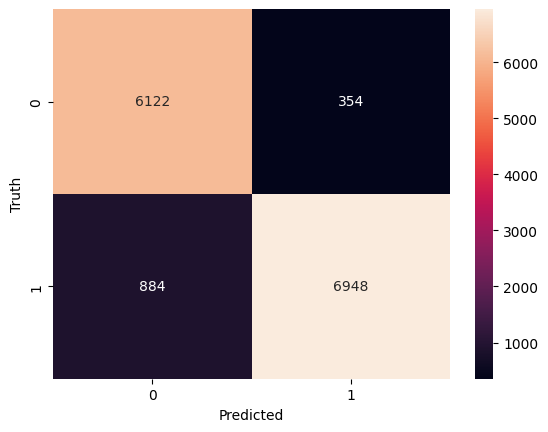

In [111]:
import seaborn as sns

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [120]:
import os

os.chdir(r'/kaggle/working')

In [122]:
from IPython.display import FileLink
FileLink(r'model.zip')

/kaggle/working/model.zip

In [119]:
!zip -r model.zip bert_text_classifier

  adding: bert_text_classifier/ (stored 0%)
  adding: bert_text_classifier/saved_model.pb (deflated 92%)
  adding: bert_text_classifier/variables/ (stored 0%)
  adding: bert_text_classifier/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: bert_text_classifier/variables/variables.index (deflated 79%)
  adding: bert_text_classifier/assets/ (stored 0%)
  adding: bert_text_classifier/assets/vocab.txt (deflated 53%)
  adding: bert_text_classifier/keras_metadata.pb (deflated 83%)
  adding: bert_text_classifier/fingerprint.pb (stored 0%)
